# Ploidy Annotation 

#### Working directory should contain root atlas Seurat object, which is available on GEO under record GSE152766:

    Root_Atlas.rds (or get it by running through notebook 2)
    
#### Working directory must contain subdirectories,supp_data

#### supp_data/ should contain the file:

    endo_exp.RD

In [1]:
rm(list=ls())
# Set the working directory to where folders named after the samples are located. 
# The folder contains spliced.mtx, unspliced.mtx, barcodes and gene id files, and json files produced by scKB that documents the sequencing stats. 
setwd("/scratch/AG_Ohler/CheWei/scKB")

In [2]:
# Load libraries
suppressMessages(library(Matrix))
suppressMessages(library(DropletUtils))
suppressMessages(library(ggplot2))
suppressMessages(library(scales))
suppressMessages(library(Seurat))
suppressMessages(library(tidyverse))

In [3]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /fast/home/c/chsu/anaconda3/envs/seu4/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.utf-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.utf-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=en_US.utf-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=en_US.utf-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.utf-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] forcats_0.5.0               stringr_1.4.0              
 [3] dplyr_1.0.2                 purrr_0.3.4                
 [5] readr_1.4.0                 tidyr_1.1.2                
 [7] tibble_3.0.4                tidyverse_1.3.0            
 [9] SeuratObject_4.0.0        

In [4]:
# Load atlas
rc.integrated <- readRDS("./Root_Atlas.rds")

## 2. Correlation-based annotation

In [30]:
# Load reference expression profiles from Bhosale et al. 2018, The Plant Cell 
load(file="./supp_data/endo_exp.RD")

In [31]:
# Reference expression profiles for ploidy
endo_exp[1:10,]

,2C,4C,8C,16C
,<dbl>,<dbl>,<dbl>,<dbl>
AT1G14970,6.563969,6.500491,6.026446,5.977083
AT5G43080,6.363386,5.791167,5.306105,5.570292
AT4G11920,5.936253,5.190429,5.840621,5.418201
AT1G60230,5.353565,5.049578,4.788123,4.726203
AT1G27880,5.864445,4.814687,4.161259,4.329577
AT5G05630,5.882500,5.675593,5.044833,5.341021
AT1G26190,5.632952,5.224476,5.018158,5.125195
AT5G60230,6.615915,6.767113,5.897307,6.227721
AT3G01370,6.573468,6.208032,5.636543,5.894022


In [32]:
# Extract matrix of SCTransformed expression value 
rc1 <- as.matrix(rc.integrated@assays$SCT@data[,1:44000])
rc2 <- as.matrix(rc.integrated@assays$SCT@data[,44001:88000])
rc3 <- as.matrix(rc.integrated@assays$SCT@data[,88001:110427])

In [33]:
rc <- cbind(rc1, rc2)
rc <- cbind(rc, rc3)

In [34]:
str(rc)

 num [1:24997, 1:110427] 0 0.693 0 0 1.386 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:24997] "AT1G01010" "AT1G01020" "AT1G01030" "AT1G01040" ...
  ..$ : chr [1:110427] "AAACCCAAGCCATTCA_1" "AAACCCAAGCTGTTCA_1" "AAACCCAAGGCGAACT_1" "AAACCCACACCAGCCA_1" ...


In [35]:
# Merge the reference expression profile with the normalized expression matrix of our sample  

merge.rownames <- function (x,y){
  dat <- merge(x = x, y = y, by = "row.names")
  rownames(dat) <- dat$Row.names
  dat <- dat[,-1]
  return(dat)
}

ploidy <- Reduce(merge.rownames, list(endo_exp,rc))

In [36]:
# Prepare customized label name (optional)
ploidy_label=c("2C", "4C", "8C", "16C")

In [37]:
ploidy[,1:10]

,2C,4C,8C,16C,AAACCCAAGCCATTCA_1,AAACCCAAGCTGTTCA_1,AAACCCAAGGCGAACT_1,AAACCCACACCAGCCA_1,AAACCCACACTGGCGT_1,AAACCCACAGACCTGC_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G01010,5.088942,5.269233,5.905833,5.321902,0.0000000,1.0986123,1.6094379,0.000000,0.000000,0.6931472
AT1G01920,6.191873,6.784863,5.010768,5.297529,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
AT1G02670,6.667419,5.462500,5.503889,5.388567,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
AT1G03270,5.515837,5.465367,4.331265,4.423271,0.0000000,0.0000000,0.0000000,1.386294,0.000000,0.0000000
AT1G03780,5.354975,6.584943,4.833016,4.954902,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
AT1G03840,6.303443,6.468116,6.180071,5.631676,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
AT1G05300,5.768840,5.976778,6.635946,6.676739,0.6931472,0.0000000,1.0986123,0.000000,0.000000,0.6931472
AT1G05320,8.648901,8.150168,7.753943,9.867349,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
AT1G05910,6.391448,5.948248,6.308717,6.159871,0.0000000,0.0000000,0.0000000,1.386294,0.000000,0.0000000


In [38]:
# Calculating the correlation coefficient of each cell to each reference expression profile and annotate the cell as the label that it has the highest correlation coefficient with.  
ploidy_stat <- suppressWarnings(sapply(5:ncol(ploidy), function(i) sapply(1:4, function(j) cor.test(ploidy[,i],ploidy[,j],method = "pearson")[c(3,4)])))
ploidy_cor <- ploidy_stat[seq(2,nrow(ploidy_stat),2),]
ploidy_pvalue <- ploidy_stat[seq(1,nrow(ploidy_stat)-1,2),]
ploidy_max <- sapply(1:(ncol(ploidy)-4), function(i) max(as.numeric(ploidy_cor[,i])))
ploidy_ident <- sapply(1:(ncol(ploidy)-4), function(i) ploidy_label[which(as.numeric(ploidy_cor[,i])==max(as.numeric(ploidy_cor[,i])))])
ploidy_maxp <- sapply(1:(ncol(ploidy)-4), function(i) as.numeric(ploidy_pvalue[,i])[which(as.numeric(ploidy_cor[,i])==max(as.numeric(ploidy_cor[,i])))])
names(ploidy_max) <- ploidy_ident
                    

In [39]:
# Store the annotation, correlation coefficient and the p-value in Seurat object
rc.integrated@meta.data$ploidy.ID.P <- as.character(ploidy_ident)
rc.integrated@meta.data$ploidy.cor.P <- ploidy_max
rc.integrated@meta.data$ploidy.pvalue.P <- ploidy_maxp

# In case there is cell with insufficient information for annotation, label them as "unknown"
rc.integrated@meta.data$ploidy.ID.P[which(rc.integrated@meta.data$ploidy.ID.P=='character(0)')]="unknown"

## 4. Plotting

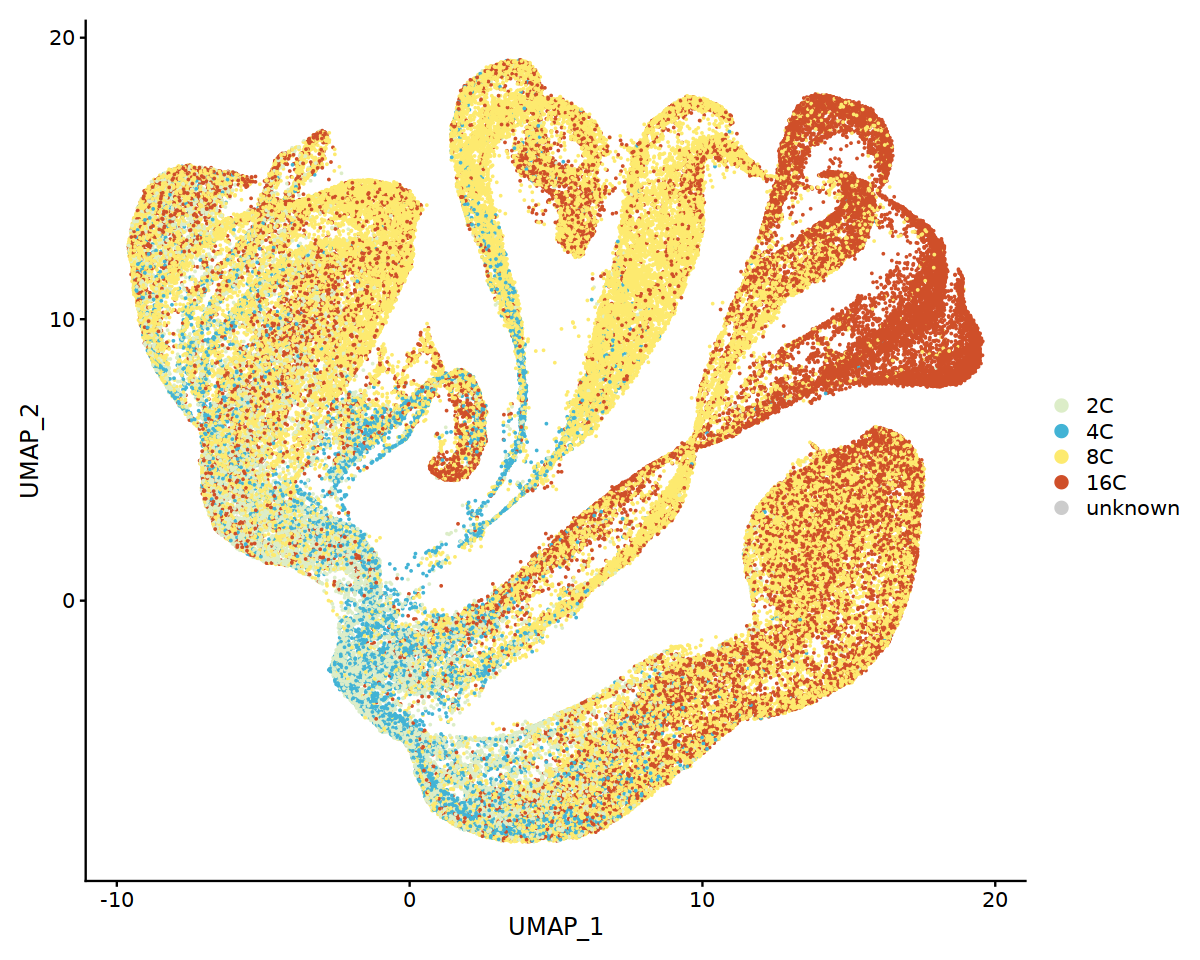

In [47]:
options(repr.plot.width=10, repr.plot.height=8)
order <- c("2C","4C","8C","16C","unknown")
palette <- c("#DCEDC8","#42B3D5","#FDEA6F","#CF4F29","#cccccc")
rc.integrated$ploidy.ID.P <- factor(rc.integrated$ploidy.ID.P, levels = order[sort(match(unique(rc.integrated$ploidy.ID.P),order))]) 
color <- palette[sort(match(unique(rc.integrated$ploidy.ID.P),order))]
DimPlot(rc.integrated, group.by="ploidy.ID.P", cols=color)

In [52]:
# Save Seurat object
saveRDS(rc.integrated, file = "./Root_Atlas.rds")